In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(123456)

 - https://stackoverflow.com/questions/57888324/how-to-combine-numpy-isclose-function
 - https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html
 - https://seaborn.pydata.org/generated/seaborn.scatterplot.html
 - https://en.wikipedia.org/wiki/Nearest_neighbor_search
 - https://en.wikipedia.org/wiki/K-d_tree
 - https://scikit-learn.org/stable/modules/neighbors.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree
 - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree.query_radius

In [3]:
# Parameters
N = 50
atol = 50
keys = ['x', 'y']

# Trials Datasets:
df1 = pd.DataFrame(np.random.randint(0, 500, size=(N-5, 2)), columns=keys).reset_index()
df2 = pd.DataFrame(np.random.randint(0, 500, size=(N+5, 2)), columns=keys).reset_index()

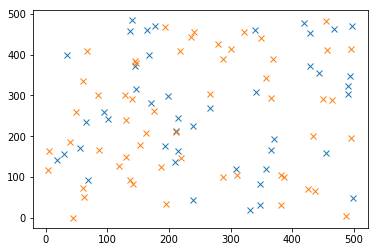

In [4]:
fig, axe = plt.subplots()
axe.plot(df1['x'], df1['y'], 'x')
axe.plot(df2['x'], df2['y'], 'x')

In [5]:
# Spatial Index for Datasets:
kdt1 = KDTree(df1[keys].values, leaf_size=5, metric='euclidean')
kdt2 = KDTree(df2[keys].values, leaf_size=5, metric='euclidean')

In [6]:
# Answer Q2.a and Q2.b:
df1['kNN'] = kdt2.query(df1[keys].values, k=1, return_distance=False)[:,0]
df2['kNN'] = kdt1.query(df2[keys].values, k=1, return_distance=False)[:,0]

In [7]:
# Answer Q1.a and Q1.b:
df1['radius'] = kdt2.query_radius(df1[keys].values, atol)
df2['radius'] = kdt1.query_radius(df2[keys].values, atol)

In [8]:
print(df1.head())

   index    x    y  kNN    radius
0      0   65  234   39      [39]
1      1  498   49   11      [11]
2      2   56  171   19  [29, 19]
3      3  239   43   20      [20]
4      4  347   32   50      [50]


In [9]:
kNN1 = df1.merge(df2[['index'] + keys], left_on='kNN', right_on='index', suffixes=('_a', '_b'))
kNN2 = df2.merge(df1[['index'] + keys], left_on='kNN', right_on='index', suffixes=('_a', '_b'))
print(kNN1.head())

   index_a  x_a  y_a  kNN    radius  index_b  x_b  y_b
0        0   65  234   39      [39]       39   49  260
1        1  498   49   11      [11]       11  487    4
2        2   56  171   19  [29, 19]       19   39  186
3        3  239   43   20      [20]       20  195   33
4        4  347   32   50      [50]       50  382   32


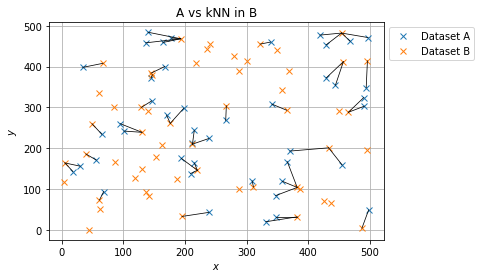

In [10]:
X = kNN1.loc[:,['x_a','x_b']].values
Y = kNN1.loc[:,['y_a','y_b']].values

fig, axe = plt.subplots()
axe.plot(df1['x'], df1['y'], 'x', label='Dataset A')
axe.plot(df2['x'], df2['y'], 'x', label='Dataset B')
for k in range(X.shape[0]):
    axe.plot(X[k,:], Y[k,:], linewidth=0.75, color='black')
axe.set_title("A vs kNN in B")
axe.set_xlabel(r'$x$')
axe.set_ylabel(r'$y$')
axe.grid()
axe.legend(bbox_to_anchor=(1,1), loc='upper left')

In [11]:
rad1 = df1.explode('radius')\
           .merge(df2[['index'] + keys], left_on='radius', right_on='index', suffixes=('_a', '_b'))
rad2 = df2.explode('radius')\
           .merge(df1[['index'] + keys], left_on='radius', right_on='index', suffixes=('_a', '_b'))

In [12]:
print(rad1.sort_values('index_a').head())

   index_a  x_a  y_a  kNN radius  index_b  x_b  y_b
0        0   65  234   39     39       39   49  260
2        1  498   49   11     11       11  487    4
3        2   56  171   19     29       29   86  167
4        2   56  171   19     19       19   39  186
7        3  239   43   20     20       20  195   33


In [13]:
def plot(A, B, join, title=''):
    X = join.loc[:,['x_a','x_b']].values
    Y = join.loc[:,['y_a','y_b']].values
    fig, axe = plt.subplots()
    axe.plot(A['x'], A['y'], 'x', label='Dataset A')
    axe.plot(B['x'], B['y'], 'x', label='Dataset B')
    for k in range(X.shape[0]):
        axe.plot(X[k,:], Y[k,:], linewidth=0.75, color='black')
    axe.set_title(title)
    axe.set_xlabel(r'$x$')
    axe.set_ylabel(r'$y$')
    axe.grid()
    axe.legend(bbox_to_anchor=(1,1), loc='upper left')
    return axe

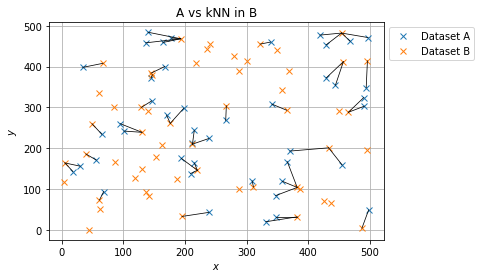

In [14]:
plot(df1, df2, kNN1, "A vs kNN in B")

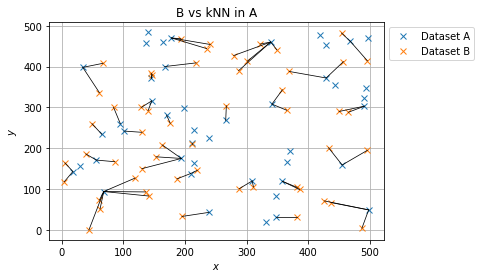

In [15]:
plot(df1, df2, kNN2, "B vs kNN in A")

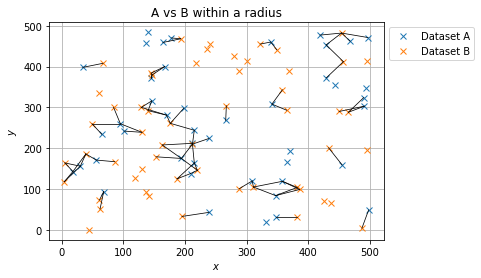

In [16]:
plot(df1, df2, rad1, "A vs B within a radius")

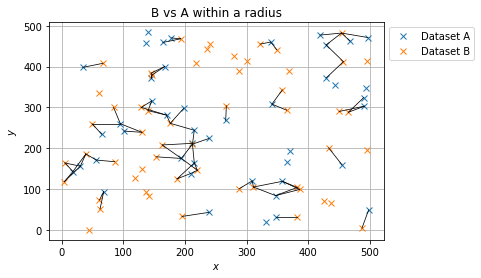

In [17]:
plot(df1, df2, rad2, "B vs A within a radius")